In [1]:
!pip install folium

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
# import platform
from matplotlib import font_manager, rc

In [77]:
from matplotlib import font_manager, rc
# font_path = "C:/Windows/Fonts/gulim.ttc"
font_path = "c:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

daegu_cctv = pd.read_csv('../data/d_CCTV_20200318.csv',  encoding='euc-kr')
daegu_cctv.head()

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,관리기관전화번호,위도,경도,데이터기준일자
0,대구광역시청,대구광역시 달성군 구지면 응암리 646,대구광역시 달성군 구지면 응암리 646,교통정보수집,1,200,자동차 진행 방면,NaN,2016-11,053-803-4573,35.647368,128.415547,2020-03-18
1,대구광역시청,대구광역시 달성군 구지면 화산리 704,대구광역시 달성군 구지면 화산리 704,교통정보수집,1,200,자동차 진행 방면,NaN,2016-11,053-803-4573,35.664422,128.399093,2020-03-18
2,대구광역시청,대구광역시 동구 국채보상로 827,대구광역시 동구 신천3동 850-6,교통단속,1,130,버스전용차로 차량 진행방면,NaN,1999-11,053-803-4887,35.868391,128.620699,2020-03-18
3,대구광역시청,대구광역시 동구 국채보상로 827,대구광역시 동구 신천3동 850-6,교통단속,1,130,버스전용차로 차량 진행방면,NaN,1999-11,053-803-4887,35.868391,128.620699,2020-03-18
4,대구광역시청,대구광역시 북구 관문동 618-49,대구광역시 북구 관문동 618-49,교통단속,1,130,버스전용차로 차량 진행방면,NaN,2000-04,053-803-4887,35.902207,128.547110,2020-03-18


In [78]:
daegu_cctv.shape

(308, 13)

In [79]:
daegu_cctv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   관리기관명     308 non-null    object 
 1   소재지도로명주소  308 non-null    object 
 2   소재지지번주소   308 non-null    object 
 3   설치목적구분    308 non-null    object 
 4   카메라대수     308 non-null    int64  
 5   카메라화소수    308 non-null    int64  
 6   촬영방면정보    308 non-null    object 
 7   보관일수      0 non-null      float64
 8   설치년월      308 non-null    object 
 9   관리기관전화번호  308 non-null    object 
 10  위도        308 non-null    float64
 11  경도        308 non-null    float64
 12  데이터기준일자   308 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 31.4+ KB


In [80]:
daegu_cctv.describe() #describe() : 숫자형 정보에 대한 통계값

,카메라대수,카메라화소수,보관일수,위도,경도
count,308.0,308.000000,0.0,308.000000,308.000000
mean,1.0,126.860390,NaN,35.858467,128.587524
std,0.0,67.114249,NaN,0.041613,0.059466
min,1.0,41.000000,NaN,35.647368,128.398886
25%,1.0,41.000000,NaN,35.847526,128.553984
50%,1.0,130.000000,NaN,35.865742,128.590158
75%,1.0,200.000000,NaN,35.877319,128.624370
max,1.0,200.000000,NaN,35.992603,128.730851


In [81]:
daegu_cctv.describe(include='object') 

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,촬영방면정보,설치년월,관리기관전화번호,데이터기준일자
count,308,308,308,308,308,308,308,308
unique,1,243,244,4,24,52,4,1
top,대구광역시청,대구광역시 동구 신서동 1143,대구광역시 동구 신서동 1143,교통단속,자동차 진행 방면,2009-02,053-803-4887,2020-03-18
freq,308,6,6,145,131,39,145,308


In [82]:
daegu_cctv.head(3)

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,관리기관전화번호,위도,경도,데이터기준일자
0,대구광역시청,대구광역시 달성군 구지면 응암리 646,대구광역시 달성군 구지면 응암리 646,교통정보수집,1,200,자동차 진행 방면,NaN,2016-11,053-803-4573,35.647368,128.415547,2020-03-18
1,대구광역시청,대구광역시 달성군 구지면 화산리 704,대구광역시 달성군 구지면 화산리 704,교통정보수집,1,200,자동차 진행 방면,NaN,2016-11,053-803-4573,35.664422,128.399093,2020-03-18
2,대구광역시청,대구광역시 동구 국채보상로 827,대구광역시 동구 신천3동 850-6,교통단속,1,130,버스전용차로 차량 진행방면,NaN,1999-11,053-803-4887,35.868391,128.620699,2020-03-18


In [83]:
daegu_cctv.tail(3)

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,관리기관전화번호,위도,경도,데이터기준일자
305,대구광역시청,대구광역시 달서구 송현동 1044-2,대구광역시 달서구 송현동 1044-2,교통정보수집,1,41,자동차 진행 방면,NaN,2011-07,053-803-4573,35.837616,128.557529,2020-03-18
306,대구광역시청,대구광역시 달서구 감산동 440-2,대구광역시 달서구 감산동 440-2,교통정보수집,1,41,자동차 진행 방면,NaN,2011-07,053-803-4573,35.850156,128.537257,2020-03-18
307,대구광역시청,대구광역시 달성군 구지면 응암리 1202-12,대구광역시 달성군 구지면 응암리 1202-12,교통정보수집,1,200,자동차 진행 방면,NaN,2016-09,053-803-4573,35.656490,128.415901,2020-03-18


In [84]:
daegu_cctv['설치목적구분'].value_counts() #value_count() 시리즈에만 적용 가능 

교통단속      145
교통정보수집    131
생활방범       20
재난재해       12
Name: 설치목적구분, dtype: int64

In [85]:
daegu_cctv['설치목적구분'].to_numpy() #to_numpy() :numpy배열로 만듦

array(['교통정보수집', '교통정보수집', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속',
       '교통단속', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속',
       '교통단속', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속',
       '교통단속', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속',
       '교통단속', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속',
       '교통단속', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속',
       '교통단속', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속',
       '교통단속', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속',
       '교통단속', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속',
       '교통단속', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속',
       '교통단속', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속',
       '교통단속', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속',
       '교통단속', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속',
       '교통단속', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속', '교통단속',
  

In [86]:
np.unique(daegu_cctv['설치목적구분'].to_numpy(), return_counts=True)

(array(['교통단속', '교통정보수집', '생활방범', '재난재해'], dtype=object),
 array([145, 131,  20,  12], dtype=int64))

In [87]:
type(np.unique(daegu_cctv['설치목적구분'].to_numpy()))

numpy.ndarray

In [88]:
daegu_cctv['카메라대수'].value_counts()

1    308
Name: 카메라대수, dtype: int64

In [89]:
daegu_cctv['촬영방면정보'].value_counts()

자동차 진행 방면          131
불법 주정차 예상위치 방면     121
버스전용차로 차량 진행방면      24
하천 수위 방면            12
2.28 주차장 방면          1
광장휴게소 주차장 방면         1
관리사무소 입구 방면          1
시계탑 삼거리 방면           1
두류수영장 뒷편 삼거리 방면      1
친수형 휴게마당 방면          1
다목적 운동장 방면           1
인라인스케이트장 방면          1
성당주차장 방면             1
성당못 방면               1
성당휴게소 사거리 방면         1
부용정 입구 방면            1
야구장입구 삼거리 방면         1
반도지 삼거리 방면           1
체육공원 사거리 방면          1
산마루휴게소 주차장 방면        1
야외음악당옆 인도 방면         1
관광정보센터 주차장 방면        1
두류테니스장 주차장 방면        1
수경지 방면               1
Name: 촬영방면정보, dtype: int64

In [90]:
daegu_cctv['보관일수'].value_counts()

Series([], Name: 보관일수, dtype: int64)

In [91]:
daegu_cctv['보관일수'].isna().sum()

308

In [92]:
daegu_cctv['보관일수'].isna() #isna() : null 이면 true null 이 아니면 false

0      True
1      True
2      True
3      True
4      True
       ... 
303    True
304    True
305    True
306    True
307    True
Name: 보관일수, Length: 308, dtype: bool

In [93]:
daegu_cctv.isna().sum() #모든 NULL 값 더함 

관리기관명         0
소재지도로명주소      0
소재지지번주소       0
설치목적구분        0
카메라대수         0
카메라화소수        0
촬영방면정보        0
보관일수        308
설치년월          0
관리기관전화번호      0
위도            0
경도            0
데이터기준일자       0
dtype: int64

In [94]:
daegu_cctv['설치년월'].min()
daegu_cctv['설치년월'].max()

'2090-07'

In [95]:
daegu_cctv['설치년월'].value_counts()

2009-02    39
2017-05    30
2015-11    20
2010-12    19
2014-08    18
1988-08    15
2011-07    13
2002-04    10
2015-05     8
1991-10     7
2002-11     7
1990-07     6
2000-12     6
2011-01     6
2011-11     6
2013-08     6
2013-01     6
2015-01     6
2014-06     6
2016-12     6
2014-04     5
1994-07     5
2007-06     5
1989-06     5
2014-09     4
2012-12     4
2007-11     4
2004-01     3
2003-02     3
1998-06     2
2016-11     2
1999-11     2
2017-03     2
2016-02     2
2014-12     2
2013-11     2
2015-09     1
2011-09     1
2011-02     1
2008-04     1
1994-09     1
2089-06     1
2090-07     1
2010-05     1
2013-05     1
1999-01     1
1997-06     1
1998-02     1
2016-05     1
2006-02     1
2000-04     1
2016-09     1
Name: 설치년월, dtype: int64

In [96]:
daegu_cctv['관리기관전화번호'].value_counts()

053-803-4887    145
053-803-4573    131
053-803-7482     20
053-803-2672     12
Name: 관리기관전화번호, dtype: int64

In [97]:
daegu_cctv['데이터기준일자'].value_counts()

2020-03-18    308
Name: 데이터기준일자, dtype: int64

In [98]:
daegu_cctv[daegu_cctv['설치년월'].isin(['2089-06','2090-07'])]

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,관리기관전화번호,위도,경도,데이터기준일자
230,대구광역시청,대구광역시 서구 평리동 718-1,대구광역시 서구 평리동 718-1,교통정보수집,1,41,자동차 진행 방면,NaN,2090-07,053-803-4573,35.872292,128.571114,2020-03-18
245,대구광역시청,대구광역시 중구 동산동 312,대구광역시 중구 동산동 312,교통정보수집,1,41,자동차 진행 방면,NaN,2089-06,053-803-4573,35.866438,128.587642,2020-03-18


In [99]:
daegu_cctv.loc[220:250,:] #loc[] : 인덱스로 가져오기 

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,관리기관전화번호,위도,경도,데이터기준일자
220,대구광역시청,대구광역시 북구 복현동 623,대구광역시 북구 복현동 623,교통정보수집,1,41,자동차 진행 방면,NaN,1994-07,053-803-4573,35.897673,128.614996,2020-03-18
221,대구광역시청,대구광역시 동구 효목동 964,대구광역시 동구 효목동 964,교통정보수집,1,41,자동차 진행 방면,NaN,1990-07,053-803-4573,35.885569,128.633053,2020-03-18
222,대구광역시청,대구광역시 동구 신암동 368,대구광역시 동구 신암동 368,교통정보수집,1,41,자동차 진행 방면,NaN,1990-07,053-803-4573,35.883319,128.623946,2020-03-18
223,대구광역시청,대구광역시 동구 신암동 804-4,대구광역시 동구 신암동 804-4,교통정보수집,1,41,자동차 진행 방면,NaN,1990-07,053-803-4573,35.882720,128.613606,2020-03-18
224,대구광역시청,대구광역시 중구 동인동1가 405-1,대구광역시 중구 동인동1가 405-1,교통정보수집,1,41,자동차 진행 방면,NaN,1988-08,053-803-4573,35.872562,128.604525,2020-03-18
225,대구광역시청,대구광역시 중구 동인동1가 116-3,대구광역시 중구 동인동1가 116-3,교통정보수집,1,41,자동차 진행 방면,NaN,1988-08,053-803-4573,35.873836,128.601333,2020-03-18
226,대구광역시청,대구광역시 중구 태평로 3가 225-1,대구광역시 중구 태평로 3가 225-1,교통정보수집,1,41,자동차 진행 방면,NaN,1988-08,053-803-4573,35.876472,128.587980,2020-03-18
227,대구광역시청,대구광역시 중구 수창동 104-7,대구광역시 중구 수창동 104-7,교통정보수집,1,41,자동차 진행 방면,NaN,1988-08,053-803-4573,35.877673,128.581502,2020-03-18
228,대구광역시청,대구광역시 서구 비산동 541-25,대구광역시 서구 비산동 541-25,교통정보수집,1,41,자동차 진행 방면,NaN,1990-07,053-803-4573,35.879602,128.571338,2020-03-18
229,대구광역시청,대구광역시 서구 평리동 1621-26,대구광역시 서구 평리동 1621-26,교통정보수집,1,41,자동차 진행 방면,NaN,2002-04,053-803-4573,35.870471,128.554923,2020-03-18


In [100]:
daegu_cctv[daegu_cctv['설치년월'] == '2089-06']

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,관리기관전화번호,위도,경도,데이터기준일자
245,대구광역시청,대구광역시 중구 동산동 312,대구광역시 중구 동산동 312,교통정보수집,1,41,자동차 진행 방면,NaN,2089-06,053-803-4573,35.866438,128.587642,2020-03-18


In [101]:
#loc[]  로 daegu_cctv표의 열 이름이 '설치년월'이 2089-06 인거 찾고, 설치년월인 데이터 값찾기 -> 그 값을 바꾸기 
daegu_cctv.loc[daegu_cctv['설치년월'] == '2089-06', '설치년월'] = '1989-06' #값 바꾸기 


In [102]:
daegu_cctv.loc[245:246]

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,관리기관전화번호,위도,경도,데이터기준일자
245,대구광역시청,대구광역시 중구 동산동 312,대구광역시 중구 동산동 312,교통정보수집,1,41,자동차 진행 방면,NaN,1989-06,053-803-4573,35.866438,128.587642,2020-03-18
246,대구광역시청,대구광역시 중구 봉산동 127-1,대구광역시 중구 봉산동 127-1,교통정보수집,1,41,자동차 진행 방면,NaN,1988-08,053-803-4573,35.863942,128.599459,2020-03-18


In [103]:
daegu_cctv.loc[daegu_cctv['설치년월'] == '2090-07', '설치년월'] = '1990-07' # 값 바꾸기

In [104]:
daegu_cctv.loc[230:231]

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,관리기관전화번호,위도,경도,데이터기준일자
230,대구광역시청,대구광역시 서구 평리동 718-1,대구광역시 서구 평리동 718-1,교통정보수집,1,41,자동차 진행 방면,NaN,1990-07,053-803-4573,35.872292,128.571114,2020-03-18
231,대구광역시청,대구광역시 수성구 범물동 184,대구광역시 수성구 범물동 184,교통정보수집,1,41,자동차 진행 방면,NaN,2002-04,053-803-4573,35.818903,128.649662,2020-03-18


In [105]:
daegu_cctv['설치년월'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0      2016-11
1      2016-11
2      1999-11
3      1999-11
4      2000-04
        ...   
303    2011-07
304    2011-07
305    2011-07
306    2011-07
307    2016-09
Name: 설치년월, Length: 308, dtype: object>

In [106]:
daegu_cctv.dropna(how='all', inplace=True) 

In [107]:
daegu_cctv.shape

(308, 13)

In [108]:
daegu_cctv.columns

Index(['관리기관명', '소재지도로명주소', '소재지지번주소', '설치목적구분', '카메라대수', '카메라화소수', '촬영방면정보',
       '보관일수', '설치년월', '관리기관전화번호', '위도', '경도', '데이터기준일자'],
      dtype='object')

In [109]:
#소재지도로명주소', '설치목적구분','설치년월','위도','경도' 를 뽑아서 새로운 데이터프레임으로 만듦
daegu_cctv = daegu_cctv[['소재지도로명주소', '설치목적구분','설치년월','위도','경도']]
daegu_cctv

,소재지도로명주소,설치목적구분,설치년월,위도,경도
0,대구광역시 달성군 구지면 응암리 646,교통정보수집,2016-11,35.647368,128.415547
1,대구광역시 달성군 구지면 화산리 704,교통정보수집,2016-11,35.664422,128.399093
2,대구광역시 동구 국채보상로 827,교통단속,1999-11,35.868391,128.620699
3,대구광역시 동구 국채보상로 827,교통단속,1999-11,35.868391,128.620699
4,대구광역시 북구 관문동 618-49,교통단속,2000-04,35.902207,128.547110
...,...,...,...,...,...
303,대구광역시 남구 봉덕3동 1277-2,교통정보수집,2011-07,35.832552,128.597309
304,대구광역시 남구 봉덕동 1272-5,교통정보수집,2011-07,35.833217,128.600574
305,대구광역시 달서구 송현동 1044-2,교통정보수집,2011-07,35.837616,128.557529
306,대구광역시 달서구 감산동 440-2,교통정보수집,2011-07,35.850156,128.537257


In [110]:
#도로명주소의 --구만 추출
print(daegu_cctv['소재지도로명주소'][0].split())
print(daegu_cctv['소재지도로명주소'][1].split())
print(daegu_cctv['소재지도로명주소'][1].split()[1])

['대구광역시', '달성군', '구지면', '응암리', '646']
['대구광역시', '달성군', '구지면', '화산리', '704']
달성군


In [111]:
for eachAddress in daegu_cctv['소재지도로명주소']:
    print(eachAddress.split()[1])

달성군
달성군
동구
동구
북구
동구
동구
북구
동구
동구
수성구
수성구
달서구
달서구
중구
중구
중구
중구
수성구
수성구
서구
서구
북구
북구
수성구
수성구
중구
중구
중구
중구
중구
동구
동구
동구
동구
동구
동구
동구
동구
동구
동구
동구
동구
동구
동구
서구
서구
서구
서구
서구
서구
서구
서구
서구
수성구
수성구
수성구
수성구
달서구
달서구
달서구
달서구
달서구
달서구
달서구
중구
중구
중구
중구
중구
중구
중구
중구
중구
중구
중구
중구
서구
서구
남구
남구
남구
달서구
달서구
달서구
달서구
달서구
달서구
중구
중구
동구
동구
수성구
수성구
달서구
달서구
동구
동구
북구
북구
수성구
수성구
달성군
달성군
서구
서구
북구
달서구
수성구
달서구
동구
동구
동구
동구
남구
동구
동구
중구
동구
동구
동구
동구
동구
동구
동구
동구
동구
동구
동구
서구
서구
서구
남구
남구
북구
북구
북구
수성구
수성구
수성구
달서구
달서구
달서구
달성군
달성군
달성군
달성군
달서구
달서구
달서구
달서구
달서구
달서구
달서구
달서구
달서구
달서구
달서구
달서구
달서구
달서구
달서구
달서구
달서구
달서구
달서구
달서구
북구
달성군
수성구
동구
북구
수성구
북구
동구
남구
남구
수성구
수성구
남구
남구
중구
중구
북구
북구
북구
북구
남구
달서구
달서구
달서구
수성구
수성구
수성구
동구
중구
중구
중구
중구
서구
북구
남구
북구
서구
동구
동구
북구
동구
수성구
달서구
수성구
수성구
달서구
달서구
수성구
달서구
북구
북구
북구
북구
북구
동구
동구
동구
중구
중구
중구
중구
서구
서구
서구
수성구
중구
수성구
중구
중구
중구
남구
남구
중구
남구
수성구
남구
서구
북구
중구
중구
중구
수성구
중구
수성구
동구
달서구
달성군
달서구
북구
동구
달성군
달성군
달성군
달성군
달성군
달성군
달성군
동구
동구
동구
동구
동구
동구
수성구
동구
동구
달성군
청도군
북구
달서구
서구
북구
동구
동구
동구
남구
달성군
달서구
달서구
달서구
달성군
북구
북구
수성구
달서구
서구
동구
북구
달서

In [112]:
[eachAddress.split()[1] for eachAddress in daegu_cctv['소재지도로명주소']]
    

['달성군',
 '달성군',
 '동구',
 '동구',
 '북구',
 '동구',
 '동구',
 '북구',
 '동구',
 '동구',
 '수성구',
 '수성구',
 '달서구',
 '달서구',
 '중구',
 '중구',
 '중구',
 '중구',
 '수성구',
 '수성구',
 '서구',
 '서구',
 '북구',
 '북구',
 '수성구',
 '수성구',
 '중구',
 '중구',
 '중구',
 '중구',
 '중구',
 '동구',
 '동구',
 '동구',
 '동구',
 '동구',
 '동구',
 '동구',
 '동구',
 '동구',
 '동구',
 '동구',
 '동구',
 '동구',
 '동구',
 '서구',
 '서구',
 '서구',
 '서구',
 '서구',
 '서구',
 '서구',
 '서구',
 '서구',
 '수성구',
 '수성구',
 '수성구',
 '수성구',
 '달서구',
 '달서구',
 '달서구',
 '달서구',
 '달서구',
 '달서구',
 '달서구',
 '중구',
 '중구',
 '중구',
 '중구',
 '중구',
 '중구',
 '중구',
 '중구',
 '중구',
 '중구',
 '중구',
 '중구',
 '서구',
 '서구',
 '남구',
 '남구',
 '남구',
 '달서구',
 '달서구',
 '달서구',
 '달서구',
 '달서구',
 '달서구',
 '중구',
 '중구',
 '동구',
 '동구',
 '수성구',
 '수성구',
 '달서구',
 '달서구',
 '동구',
 '동구',
 '북구',
 '북구',
 '수성구',
 '수성구',
 '달성군',
 '달성군',
 '서구',
 '서구',
 '북구',
 '달서구',
 '수성구',
 '달서구',
 '동구',
 '동구',
 '동구',
 '동구',
 '남구',
 '동구',
 '동구',
 '중구',
 '동구',
 '동구',
 '동구',
 '동구',
 '동구',
 '동구',
 '동구',
 '동구',
 '동구',
 '동구',
 '동구',
 '서구',
 '서구',
 '서구',
 '남구',
 '남구',
 '북구',
 '북구',
 '북구',
 '수

In [113]:
#새로운 시리즈인 '구' 추가 
daegu_cctv['구'] = [eachAddress.split()[1] for eachAddress in daegu_cctv['소재지도로명주소']]

In [114]:
daegu_cctv

,소재지도로명주소,설치목적구분,설치년월,위도,경도,구
0,대구광역시 달성군 구지면 응암리 646,교통정보수집,2016-11,35.647368,128.415547,달성군
1,대구광역시 달성군 구지면 화산리 704,교통정보수집,2016-11,35.664422,128.399093,달성군
2,대구광역시 동구 국채보상로 827,교통단속,1999-11,35.868391,128.620699,동구
3,대구광역시 동구 국채보상로 827,교통단속,1999-11,35.868391,128.620699,동구
4,대구광역시 북구 관문동 618-49,교통단속,2000-04,35.902207,128.547110,북구
...,...,...,...,...,...,...
303,대구광역시 남구 봉덕3동 1277-2,교통정보수집,2011-07,35.832552,128.597309,남구
304,대구광역시 남구 봉덕동 1272-5,교통정보수집,2011-07,35.833217,128.600574,남구
305,대구광역시 달서구 송현동 1044-2,교통정보수집,2011-07,35.837616,128.557529,달서구
306,대구광역시 달서구 감산동 440-2,교통정보수집,2011-07,35.850156,128.537257,달서구


In [115]:
def get_gu(address):
    return address.split()[1]

In [116]:
daegu_cctv['구'] =daegu_cctv['소재지도로명주소'].apply(get_gu)
daegu_cctv['구'] 

0      달성군
1      달성군
2       동구
3       동구
4       북구
      ... 
303     남구
304     남구
305    달서구
306    달서구
307    달성군
Name: 구, Length: 308, dtype: object

In [117]:
daegu_cctv['구'] .value_counts()

동구     64
달서구    63
중구     43
수성구    36
북구     32
서구     26
남구     22
달성군    21
청도군     1
Name: 구, dtype: int64

In [118]:
#청도군이 포함된 인덱스 삭제하기

daegu_cctv[daegu_cctv['구'] == '청도군']

,소재지도로명주소,설치목적구분,설치년월,위도,경도,구
274,경상북도 청도군 각북면 금천리 산 132-6,교통정보수집,2014-04,35.729332,128.560114,청도군


In [119]:
daegu_cctv[daegu_cctv['구'] == '청도군'].index

Int64Index([274], dtype='int64')

In [120]:
daegu_cctv[daegu_cctv['구'] == '청도군'].index[0]

274

In [121]:
#drop() : 인덱스 삭제 
daegu_cctv.drop(daegu_cctv[daegu_cctv['구'] == '청도군'].index[0] , inplace=True) 

In [122]:
daegu_cctv['구'].value_counts()

동구     64
달서구    63
중구     43
수성구    36
북구     32
서구     26
남구     22
달성군    21
Name: 구, dtype: int64

In [123]:
daegu_cctv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 0 to 307
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   소재지도로명주소  307 non-null    object 
 1   설치목적구분    307 non-null    object 
 2   설치년월      307 non-null    object 
 3   위도        307 non-null    float64
 4   경도        307 non-null    float64
 5   구         307 non-null    object 
dtypes: float64(2), object(4)
memory usage: 16.8+ KB


In [124]:
daegu_cctv.head(2)

,소재지도로명주소,설치목적구분,설치년월,위도,경도,구
0,대구광역시 달성군 구지면 응암리 646,교통정보수집,2016-11,35.647368,128.415547,달성군
1,대구광역시 달성군 구지면 화산리 704,교통정보수집,2016-11,35.664422,128.399093,달성군


In [125]:
#to_datetime() : 날짜타입으로 변환 
daegu_cctv['설치년'] = pd.to_datetime(daegu_cctv['설치년월'], format='%Y-%m').dt.year
daegu_cctv['설치월'] = pd.to_datetime(daegu_cctv['설치년월'], format='%Y-%m').dt.month

daegu_cctv.head(3)

,소재지도로명주소,설치목적구분,설치년월,위도,경도,구,설치년,설치월
0,대구광역시 달성군 구지면 응암리 646,교통정보수집,2016-11,35.647368,128.415547,달성군,2016,11
1,대구광역시 달성군 구지면 화산리 704,교통정보수집,2016-11,35.664422,128.399093,달성군,2016,11
2,대구광역시 동구 국채보상로 827,교통단속,1999-11,35.868391,128.620699,동구,1999,11


In [126]:
daegu_cctv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 0 to 307
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   소재지도로명주소  307 non-null    object 
 1   설치목적구분    307 non-null    object 
 2   설치년월      307 non-null    object 
 3   위도        307 non-null    float64
 4   경도        307 non-null    float64
 5   구         307 non-null    object 
 6   설치년       307 non-null    int64  
 7   설치월       307 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 21.6+ KB


In [127]:
def get_last_yn(x):
    return 1 if int(x) >= 2016 else 0 
    

In [128]:
# daegu_cctv['설치년'].apply(get_last_yn(x))

daegu_cctv['최근설치'] = daegu_cctv['설치년'].apply(lambda x: 1 if int(x) >= 2016 else 0)
daegu_cctv.head(3)

,소재지도로명주소,설치목적구분,설치년월,위도,경도,구,설치년,설치월,최근설치
0,대구광역시 달성군 구지면 응암리 646,교통정보수집,2016-11,35.647368,128.415547,달성군,2016,11,1
1,대구광역시 달성군 구지면 화산리 704,교통정보수집,2016-11,35.664422,128.399093,달성군,2016,11,1
2,대구광역시 동구 국채보상로 827,교통단속,1999-11,35.868391,128.620699,동구,1999,11,0


In [129]:
daegu_cctv['설치목적' ]= daegu_cctv['설치목적구분']

In [130]:
#해당하는 것은 1이고 나머지는 0으로 표시 
daegu_cctv = pd.get_dummies(daegu_cctv, columns=['설치목적구분'])
daegu_cctv

,소재지도로명주소,설치년월,위도,경도,구,설치년,설치월,최근설치,설치목적,설치목적구분_교통단속,설치목적구분_교통정보수집,설치목적구분_생활방범,설치목적구분_재난재해
0,대구광역시 달성군 구지면 응암리 646,2016-11,35.647368,128.415547,달성군,2016,11,1,교통정보수집,0,1,0,0
1,대구광역시 달성군 구지면 화산리 704,2016-11,35.664422,128.399093,달성군,2016,11,1,교통정보수집,0,1,0,0
2,대구광역시 동구 국채보상로 827,1999-11,35.868391,128.620699,동구,1999,11,0,교통단속,1,0,0,0
3,대구광역시 동구 국채보상로 827,1999-11,35.868391,128.620699,동구,1999,11,0,교통단속,1,0,0,0
4,대구광역시 북구 관문동 618-49,2000-04,35.902207,128.547110,북구,2000,4,0,교통단속,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,대구광역시 남구 봉덕3동 1277-2,2011-07,35.832552,128.597309,남구,2011,7,0,교통정보수집,0,1,0,0
304,대구광역시 남구 봉덕동 1272-5,2011-07,35.833217,128.600574,남구,2011,7,0,교통정보수집,0,1,0,0
305,대구광역시 달서구 송현동 1044-2,2011-07,35.837616,128.557529,달서구,2011,7,0,교통정보수집,0,1,0,0
306,대구광역시 달서구 감산동 440-2,2011-07,35.850156,128.537257,달서구,2011,7,0,교통정보수집,0,1,0,0


In [131]:
daegu_cctv.rename(columns = {'설치목적구분_교통단속':'교통단속', 
                             '설치목적구분_교통정보수집':'교통정보수집',
                             '설치목적구분_생활방범':'생활방범',
                             '설치목적구분_재난재해':'재난재해',
                             }, inplace = True)
daegu_cctv

,소재지도로명주소,설치년월,위도,경도,구,설치년,설치월,최근설치,설치목적,교통단속,교통정보수집,생활방범,재난재해
0,대구광역시 달성군 구지면 응암리 646,2016-11,35.647368,128.415547,달성군,2016,11,1,교통정보수집,0,1,0,0
1,대구광역시 달성군 구지면 화산리 704,2016-11,35.664422,128.399093,달성군,2016,11,1,교통정보수집,0,1,0,0
2,대구광역시 동구 국채보상로 827,1999-11,35.868391,128.620699,동구,1999,11,0,교통단속,1,0,0,0
3,대구광역시 동구 국채보상로 827,1999-11,35.868391,128.620699,동구,1999,11,0,교통단속,1,0,0,0
4,대구광역시 북구 관문동 618-49,2000-04,35.902207,128.547110,북구,2000,4,0,교통단속,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,대구광역시 남구 봉덕3동 1277-2,2011-07,35.832552,128.597309,남구,2011,7,0,교통정보수집,0,1,0,0
304,대구광역시 남구 봉덕동 1272-5,2011-07,35.833217,128.600574,남구,2011,7,0,교통정보수집,0,1,0,0
305,대구광역시 달서구 송현동 1044-2,2011-07,35.837616,128.557529,달서구,2011,7,0,교통정보수집,0,1,0,0
306,대구광역시 달서구 감산동 440-2,2011-07,35.850156,128.537257,달서구,2011,7,0,교통정보수집,0,1,0,0


In [132]:
daegu_cctv['설치년'].value_counts()

2009    39
2015    35
2014    34
2017    32
2011    27
2010    20
2002    17
1988    15
2013    15
2016    12
2007     9
1991     7
2000     7
1990     7
1994     6
1989     6
2012     4
1999     3
2004     3
1998     3
2003     3
2006     1
1997     1
2008     1
Name: 설치년, dtype: int64

In [133]:
s1 = daegu_cctv.groupby('설치년')['설치년'].count()
s1

설치년
1988    15
1989     6
1990     7
1991     7
1994     6
1997     1
1998     3
1999     3
2000     7
2002    17
2003     3
2004     3
2006     1
2007     9
2008     1
2009    39
2010    20
2011    27
2012     4
2013    15
2014    34
2015    35
2016    12
2017    32
Name: 설치년, dtype: int64

In [134]:
s1.index

Int64Index([1988, 1989, 1990, 1991, 1994, 1997, 1998, 1999, 2000, 2002, 2003,
            2004, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
            2016, 2017],
           dtype='int64', name='설치년')

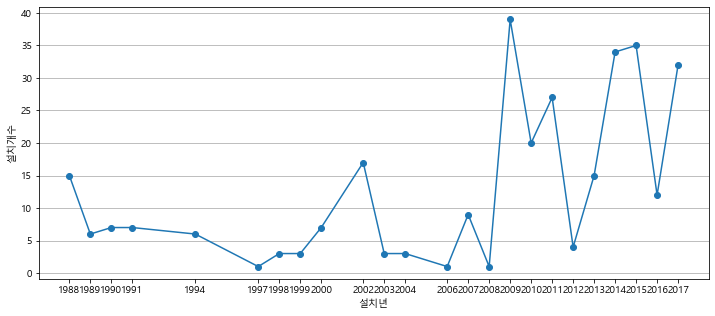

In [135]:
plt.figure(figsize=(12,5)) #크기
plt.plot(s1.index, s1.values, marker='o') #plt(x축, y축에 표시할 내용)
plt.xlabel('설치년')
plt.ylabel('설치개수')
plt.xticks(s1.index)
plt.grid(True, axis='y')
plt.show()

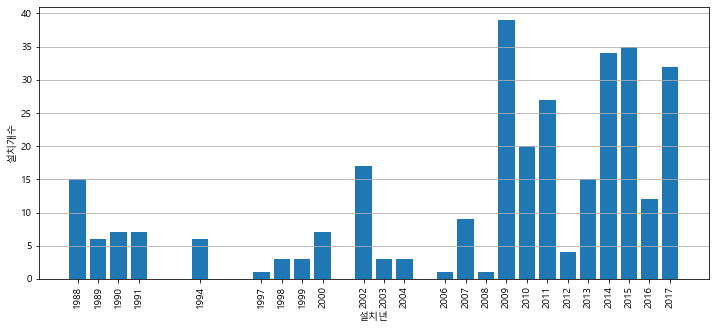

In [136]:
plt.figure(figsize=(12,5)) #크기
plt.bar(s1.index, s1.values) #bar(x축, y축에 표시할 내용)
plt.xlabel('설치년')
plt.ylabel('설치개수')
plt.xticks(s1.index, rotation=90) #x축  년도 표시하는 것
plt.grid(True, axis='y')
plt.show()

In [137]:
daegu_cctv

,소재지도로명주소,설치년월,위도,경도,구,설치년,설치월,최근설치,설치목적,교통단속,교통정보수집,생활방범,재난재해
0,대구광역시 달성군 구지면 응암리 646,2016-11,35.647368,128.415547,달성군,2016,11,1,교통정보수집,0,1,0,0
1,대구광역시 달성군 구지면 화산리 704,2016-11,35.664422,128.399093,달성군,2016,11,1,교통정보수집,0,1,0,0
2,대구광역시 동구 국채보상로 827,1999-11,35.868391,128.620699,동구,1999,11,0,교통단속,1,0,0,0
3,대구광역시 동구 국채보상로 827,1999-11,35.868391,128.620699,동구,1999,11,0,교통단속,1,0,0,0
4,대구광역시 북구 관문동 618-49,2000-04,35.902207,128.547110,북구,2000,4,0,교통단속,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,대구광역시 남구 봉덕3동 1277-2,2011-07,35.832552,128.597309,남구,2011,7,0,교통정보수집,0,1,0,0
304,대구광역시 남구 봉덕동 1272-5,2011-07,35.833217,128.600574,남구,2011,7,0,교통정보수집,0,1,0,0
305,대구광역시 달서구 송현동 1044-2,2011-07,35.837616,128.557529,달서구,2011,7,0,교통정보수집,0,1,0,0
306,대구광역시 달서구 감산동 440-2,2011-07,35.850156,128.537257,달서구,2011,7,0,교통정보수집,0,1,0,0


In [138]:
dc1 = daegu_cctv.groupby(['설치년', '설치목적'])['설치년월'].count().reset_index()
dc1.rename(columns = {'설치년월':'설치개수'}, inplace = True)
dc1.head(3)

,설치년,설치목적,설치개수
0,1988,교통정보수집,15
1,1989,교통정보수집,6
2,1990,교통정보수집,7


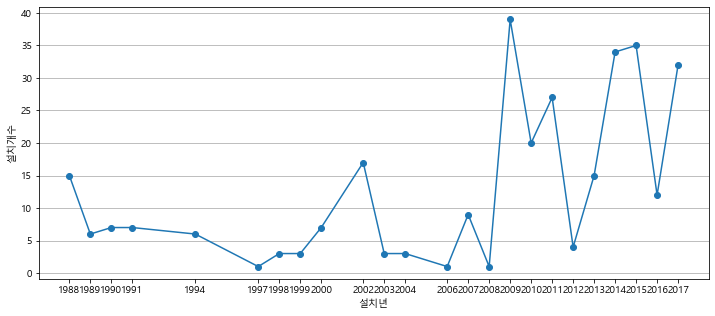

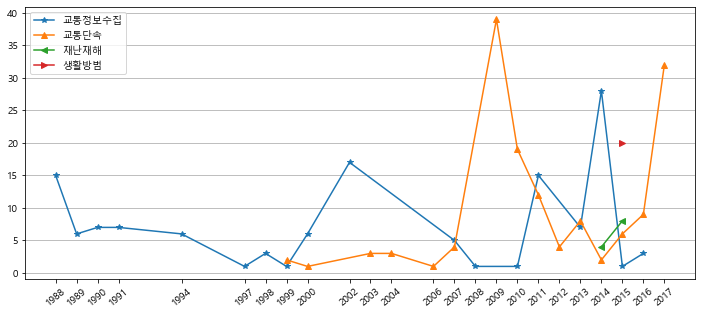

In [140]:
daegu_cctv.rename(columns = {'설치목적구분_교통단속':'교통단속', 
                             '설치목적구분_교통정보수집':'교통정보수집',
                             '설치목적구분_생활방범':'생활방범',
                             '설치목적구분_재난재해':'재난재해',
                             }, inplace = True)

plt.figure(figsize=(12, 5))
plt.plot(s1.index, s1.values, marker='o')
plt.xlabel('설치년')
plt.ylabel('설치개수')
plt.xticks(s1.index)
plt.grid(True, axis='y')
plt.show()

dc1_1 = dc1[dc1['설치목적'] == '교통정보수집']
dc1_2 = dc1[dc1['설치목적'] == '교통단속']
dc1_3 = dc1[dc1['설치목적'] == '재난재해']
dc1_4 = dc1[dc1['설치목적'] == '생활방범']

plt.figure(figsize=(12, 5))
plt.plot(dc1_1['설치년'], dc1_1['설치개수'], marker='*', label='교통정보수집')
plt.plot(dc1_2['설치년'], dc1_2['설치개수'], marker='^', label='교통단속')
plt.plot(dc1_3['설치년'], dc1_3['설치개수'], marker='<', label='재난재해')
plt.plot(dc1_4['설치년'], dc1_4['설치개수'], marker='>', label='생활방범')
plt.xticks(s1.index, rotation=40)
plt.legend()
plt.grid(True, axis='y')
plt.show()


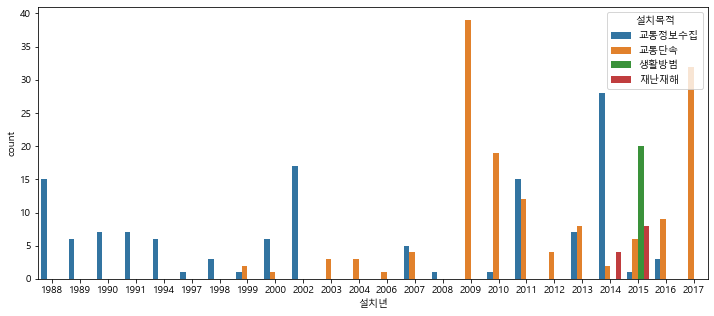

In [141]:
plt.figure(figsize=(12,5))
sns.countplot(x='설치년', hue='설치목적', data=daegu_cctv)
plt.show()

In [142]:
map = folium.Map(location=[35.872149814444164,128.6016540684953], zoom_start=12) #지도 띄우기

# 모든 cctv를 지도에 표시
for n in daegu_cctv.index:
    folium.Marker([daegu_cctv.loc[n, '위도'], daegu_cctv.loc[n, '경도']], popup=daegu_cctv.loc[n, '소재지도로명주소'], icon=folium.Icon(color='red',icon='info-sign')).add_to(map)
    
map 

In [143]:
map.save('대구_cctv_위치.html') #html 파일로 저장 

In [151]:
#groupby() : 구를 기준으로 묶음. 설치년월, 최근설치, 교통단속, 교통정보수집, 생활방법, 재난재해 표시 
daegu_cctv_gu= daegu_cctv.groupby('구')[['설치년월', '최근설치','교통단속','교통정보수집','생활방범','재난재해']].agg({
    '설치년월':'count','최근설치':'sum','교통단속':'sum','교통정보수집':'sum','생활방범':'sum','재난재해':'sum'
})
daegu_cctv_gu

,설치년월,최근설치,교통단속,교통정보수집,생활방범,재난재해
구,,,,,,
남구,22,3,6,14,0,2
달서구,63,3,22,21,20,0
달성군,21,7,6,14,0,1
동구,64,19,41,21,0,2
북구,32,3,10,19,0,3
서구,26,3,18,8,0,0
수성구,36,5,18,14,0,4
중구,43,1,24,19,0,0


In [152]:
daegu_cctv_gu.rename(columns = {'설치년월':'설치개수', '최근설치':'최근설치개수'}, inplace = True)
daegu_cctv_gu.head(3)

,설치개수,최근설치개수,교통단속,교통정보수집,생활방범,재난재해
구,,,,,,
남구,22,3,6,14,0,2
달서구,63,3,22,21,20,0
달성군,21,7,6,14,0,1


In [153]:
daegu_cctv_gu['이전설치개수'] = daegu_cctv_gu['설치개수'] - daegu_cctv_gu['최근설치개수']
daegu_cctv_gu.head(3)

,설치개수,최근설치개수,교통단속,교통정보수집,생활방범,재난재해,이전설치개수
구,,,,,,,
남구,22,3,6,14,0,2,19
달서구,63,3,22,21,20,0,60
달성군,21,7,6,14,0,1,14


In [154]:
daegu_cctv_gu['cctv개수증가율'] = daegu_cctv_gu['최근설치개수'] / daegu_cctv_gu['이전설치개수'] * 100
daegu_cctv_gu[['설치개수', '이전설치개수', '최근설치개수', 'cctv개수증가율']]


,설치개수,이전설치개수,최근설치개수,cctv개수증가율
구,,,,
남구,22,19,3,15.789474
달서구,63,60,3,5.000000
달성군,21,14,7,50.000000
동구,64,45,19,42.222222
북구,32,29,3,10.344828
서구,26,23,3,13.043478
수성구,36,31,5,16.129032
중구,43,42,1,2.380952


In [155]:
s2 = daegu_cctv_gu['설치개수'].sort_values()
s3 = daegu_cctv_gu['최근설치개수'].sort_values()
s4 = daegu_cctv_gu['cctv개수증가율'].sort_values()

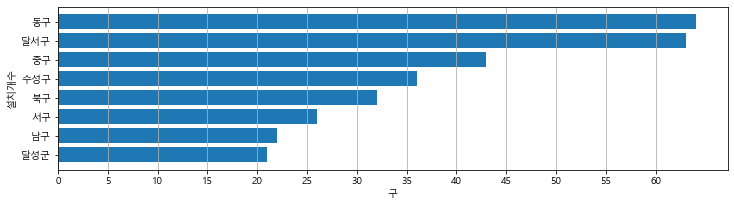

In [156]:
plt.figure(figsize=(12, 3))
plt.barh(s2.index.to_list(), s2.values) #bar 차트인데 h(가로)
plt.xlabel('구')
plt.ylabel('설치개수')
plt.xticks(np.arange(0, s2.max()+1, 5)) # 눈금
plt.grid(True, axis='x')
plt.show()

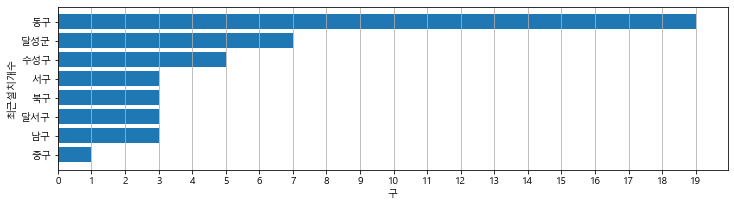

In [157]:
plt.figure(figsize=(12, 3))
plt.barh(s3.index.to_list(), s3.values)
plt.xlabel('구')
plt.ylabel('최근설치개수')
plt.xticks(np.arange(0, s3.max()+1))
plt.grid(True, axis='x')
plt.show()

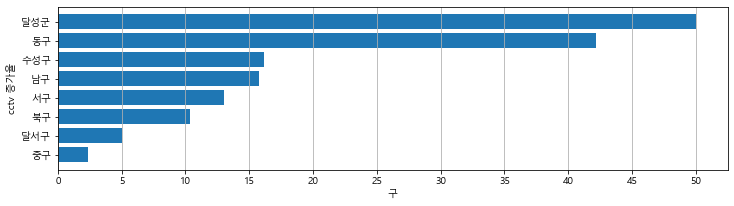

In [158]:
#구별 설치 목적별 그래프 
plt.figure(figsize=(12, 3))
plt.barh(s4.index.to_list(), s4.values)
plt.xlabel('구')
plt.ylabel('cctv 증가율')
plt.xticks(np.arange(0, s4.max()+1, 5))
plt.grid(True, axis='x')
plt.show()

In [159]:
daegu_cctv_gu


,설치개수,최근설치개수,교통단속,교통정보수집,생활방범,재난재해,이전설치개수,cctv개수증가율
구,,,,,,,,
남구,22,3,6,14,0,2,19,15.789474
달서구,63,3,22,21,20,0,60,5.000000
달성군,21,7,6,14,0,1,14,50.000000
동구,64,19,41,21,0,2,45,42.222222
북구,32,3,10,19,0,3,29,10.344828
서구,26,3,18,8,0,0,23,13.043478
수성구,36,5,18,14,0,4,31,16.129032
중구,43,1,24,19,0,0,42,2.380952


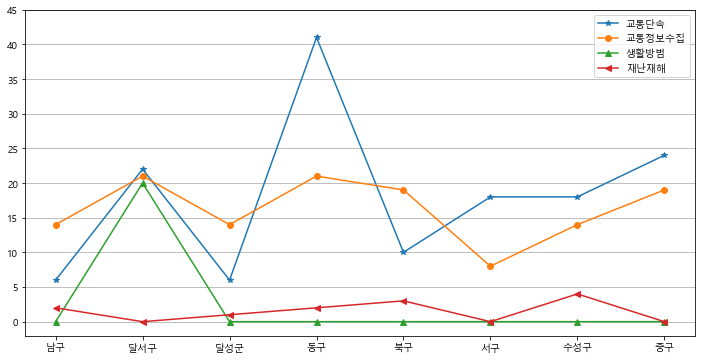

In [160]:
plt.figure(figsize=(12, 6))
plt.plot(daegu_cctv_gu.index, daegu_cctv_gu['교통단속'], marker='*')
plt.plot(daegu_cctv_gu.index, daegu_cctv_gu['교통정보수집'], marker='o')
plt.plot(daegu_cctv_gu.index, daegu_cctv_gu['생활방범'], marker='^')
plt.plot(daegu_cctv_gu.index, daegu_cctv_gu['재난재해'], marker='<')
plt.yticks(np.arange(0, 50, 5))
plt.grid(True, axis='y')
plt.legend(['교통단속', '교통정보수집', '생활방범', '재난재해'])
plt.show()

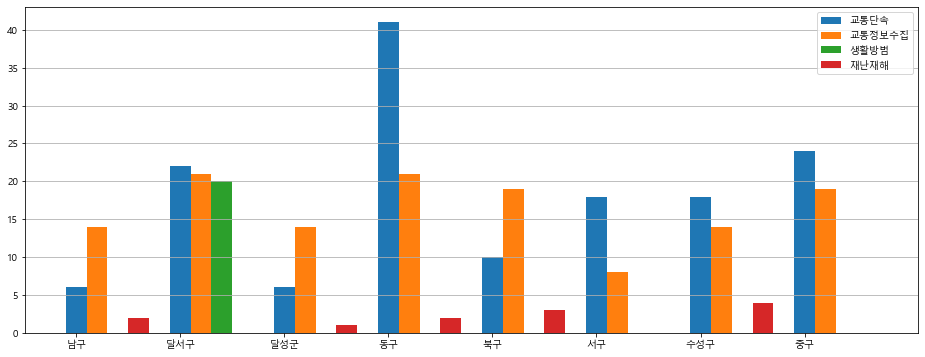

In [161]:
x_index = np.arange(0, len(daegu_cctv_gu.index))
bar_width = 0.2

plt.figure(figsize=(16, 6))
plt.bar(x_index, daegu_cctv_gu['교통단속'], bar_width)
plt.bar(x_index + bar_width, daegu_cctv_gu['교통정보수집'], bar_width)
plt.bar(x_index + (bar_width * 2), daegu_cctv_gu['생활방범'], bar_width)
plt.bar(x_index + (bar_width * 3), daegu_cctv_gu['재난재해'], bar_width)
plt.xticks(x_index, daegu_cctv_gu.index)
plt.yticks(np.arange(0, 45, 5))
plt.grid(True, axis='y')
plt.legend(['교통단속', '교통정보수집', '생활방범', '재난재해'])
plt.show()

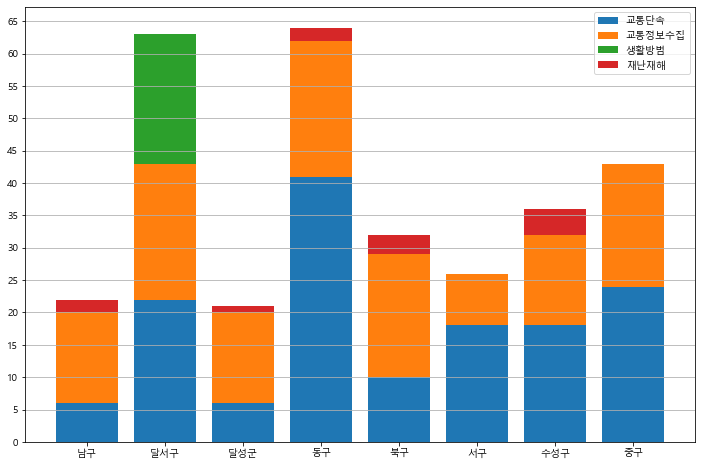

In [162]:
plt.figure(figsize=(12, 8))
plt.bar(daegu_cctv_gu.index, daegu_cctv_gu['교통단속'])
plt.bar(daegu_cctv_gu.index, daegu_cctv_gu['교통정보수집'], bottom=daegu_cctv_gu['교통단속'])
plt.bar(daegu_cctv_gu.index, daegu_cctv_gu['생활방범'], bottom=daegu_cctv_gu['교통단속'] + daegu_cctv_gu['교통정보수집'])
plt.bar(daegu_cctv_gu.index, daegu_cctv_gu['재난재해'], bottom=daegu_cctv_gu['교통단속'] + daegu_cctv_gu['교통정보수집'] + daegu_cctv_gu['생활방범'])
plt.yticks(np.arange(0, 70, 5))
plt.grid(True, axis='y')
plt.legend(['교통단속', '교통정보수집', '생활방범', '재난재해'])
plt.show()

In [163]:
# 인구수 

In [165]:
daegu_people = pd.read_csv('../data/d_people__20211028201839.csv',  encoding='euc-kr')
daegu_people

,연령별(1),행정구역(동읍면)별(1),항목,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,계,합계,계,2507271,2505644,2501588,2493264,2487829,2484557,2475231,2461769,2438031
1,계,합계,남자,1251577,1249320,1246071,1241119,1237291,1234169,1227814,1219342,1205286
2,계,합계,여자,1255694,1256324,1255517,1252145,1250538,1250388,1247417,1242427,1232745
3,계,중구,계,76600,75439,76246,78812,80928,79712,78986,79401,77421
4,계,중구,남자,37616,36980,37276,38444,39492,38720,38395,38498,37384
5,계,중구,여자,38984,38459,38970,40368,41436,40992,40591,40903,40037
6,계,동구,계,341206,342092,343802,347975,349728,351352,349379,351291,345469
7,계,동구,남자,170918,171161,171738,173633,174224,174663,173301,173955,170601
8,계,동구,여자,170288,170931,172064,174342,175504,176689,176078,177336,174868
9,계,서구,계,222619,220211,215399,210770,206028,199507,191992,184372,175277


In [166]:
daegu_people.shape

(27, 12)

In [167]:
#loc[] : [인덱스범위3번째부터 끝까지]
daegu_people = daegu_people.loc[3:]
daegu_people.head()

,연령별(1),행정구역(동읍면)별(1),항목,2011,2012,2013,2014,2015,2016,2017,2018,2019
3,계,중구,계,76600,75439,76246,78812,80928,79712,78986,79401,77421
4,계,중구,남자,37616,36980,37276,38444,39492,38720,38395,38498,37384
5,계,중구,여자,38984,38459,38970,40368,41436,40992,40591,40903,40037
6,계,동구,계,341206,342092,343802,347975,349728,351352,349379,351291,345469
7,계,동구,남자,170918,171161,171738,173633,174224,174663,173301,173955,170601


In [168]:
#항목이 계가 아닌 것 
daegu_people['항목'] != '계'

3     False
4      True
5      True
6     False
7      True
8      True
9     False
10     True
11     True
12    False
13     True
14     True
15    False
16     True
17     True
18    False
19     True
20     True
21    False
22     True
23     True
24    False
25     True
26     True
Name: 항목, dtype: bool

In [169]:
#항목이 계가 아닌 것을 다시 daegu_people에 담기 
daegu_people = daegu_people[daegu_people['항목'] != '계']
daegu_people.head()

,연령별(1),행정구역(동읍면)별(1),항목,2011,2012,2013,2014,2015,2016,2017,2018,2019
4,계,중구,남자,37616,36980,37276,38444,39492,38720,38395,38498,37384
5,계,중구,여자,38984,38459,38970,40368,41436,40992,40591,40903,40037
7,계,동구,남자,170918,171161,171738,173633,174224,174663,173301,173955,170601
8,계,동구,여자,170288,170931,172064,174342,175504,176689,176078,177336,174868
10,계,서구,남자,113135,111782,109196,106740,104213,100760,96795,92796,88052


In [170]:
#rename(columns={}) : 콜럼의 이름을 다시 설정 
daegu_people.rename(columns = {'연령별(1)':'구분', 
                             '행정구역(동읍면)별(1)':'구',
                             '항목':'성별'}, inplace = True)
daegu_people.head(3)

,구분,구,성별,2011,2012,2013,2014,2015,2016,2017,2018,2019
4,계,중구,남자,37616,36980,37276,38444,39492,38720,38395,38498,37384
5,계,중구,여자,38984,38459,38970,40368,41436,40992,40591,40903,40037
7,계,동구,남자,170918,171161,171738,173633,174224,174663,173301,173955,170601


In [171]:
#groupby()[[]] : ()기준으로 []의 시리즈를 꺼내기 
dpa = daegu_people.groupby('구분')[['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']].sum()
dpa

,2011,2012,2013,2014,2015,2016,2017,2018,2019
구분,,,,,,,,,
계,2507271,2505644,2501588,2493264,2487829,2484557,2475231,2461769,2438031


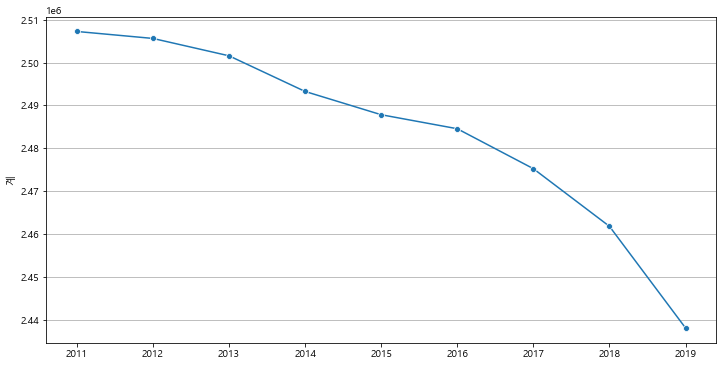

In [172]:
#lineplot() 
plt.figure(figsize=(12, 6))
sns.lineplot(x=dpa.columns, y=dpa.iloc[0], marker='o')
plt.grid(True, axis='y')
plt.show()

In [173]:
dps = daegu_people.groupby('성별')[['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']].sum()
dps

,2011,2012,2013,2014,2015,2016,2017,2018,2019
성별,,,,,,,,,
남자,1251577,1249320,1246071,1241119,1237291,1234169,1227814,1219342,1205286
여자,1255694,1256324,1255517,1252145,1250538,1250388,1247417,1242427,1232745


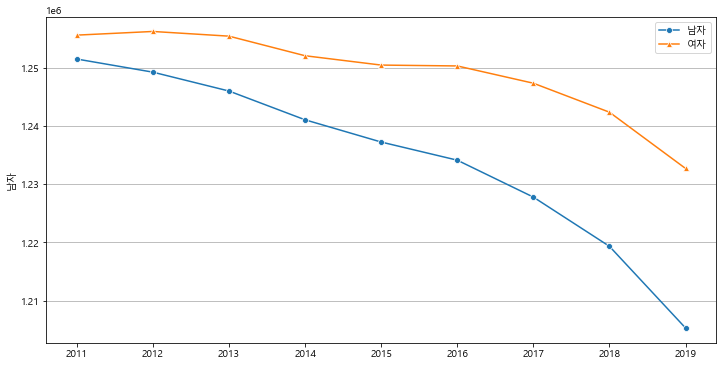

In [174]:
#lineplot() 남자, 여자 
plt.figure(figsize=(12, 6))
sns.lineplot(x=dps.columns, y=dps.iloc[0], marker='o')
sns.lineplot(x=dps.columns, y=dps.iloc[1], marker='^')
plt.grid(True, axis='y')
plt.legend(['남자', '여자'])
plt.show()

In [175]:
daegu_people.shape

(16, 12)

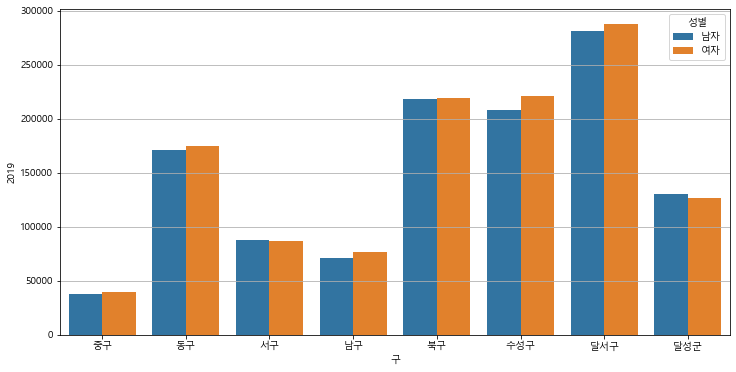

In [176]:
plt.figure(figsize=(12, 6))
sns.barplot(x='구', y='2019', hue='성별', data=daegu_people)
plt.grid(True, axis='y')
plt.show()

In [177]:
daegu_people

,구분,구,성별,2011,2012,2013,2014,2015,2016,2017,2018,2019
4,계,중구,남자,37616,36980,37276,38444,39492,38720,38395,38498,37384
5,계,중구,여자,38984,38459,38970,40368,41436,40992,40591,40903,40037
7,계,동구,남자,170918,171161,171738,173633,174224,174663,173301,173955,170601
8,계,동구,여자,170288,170931,172064,174342,175504,176689,176078,177336,174868
10,계,서구,남자,113135,111782,109196,106740,104213,100760,96795,92796,88052
11,계,서구,여자,109484,108429,106203,104030,101815,98747,95197,91576,87225
13,계,남구,남자,82674,82455,81060,79758,78305,76147,74133,72664,71366
14,계,남구,여자,86421,86260,85002,83734,82547,80286,78712,77837,76747
16,계,북구,남자,225858,225108,222780,222664,221876,220247,220579,219307,218150
17,계,북구,여자,223917,223377,221579,221711,221243,220136,220796,220182,219560


In [178]:
#인구 수의 차이를 확인하기 위함 
dpm = daegu_people.loc[daegu_people['성별'] == '남자', ['구', '2015', '2019']]
dpw = daegu_people.loc[daegu_people['성별'] == '여자', ['구', '2015', '2019']]
dpm.columns = ['구', '2015_남', '2019_남']
dpw.columns = ['구', '2015_여', '2019_여']
print(dpm.head(3))
print('--------------------')
print(dpw.head(3))

     구  2015_남  2019_남
4   중구   39492   37384
7   동구  174224  170601
10  서구  104213   88052
--------------------
     구  2015_여  2019_여
5   중구   41436   40037
8   동구  175504  174868
11  서구  101815   87225


In [179]:
#cctv데이터의 구 
daegu_cctv_gu = pd.merge(daegu_cctv_gu, dpm, on='구', how='left')
daegu_cctv_gu = pd.merge(daegu_cctv_gu, dpw, on='구', how='left')
daegu_cctv_gu

,구,설치개수,최근설치개수,교통단속,교통정보수집,생활방범,재난재해,이전설치개수,cctv개수증가율,2015_남,2019_남,2015_여,2019_여
0,남구,22,3,6,14,0,2,19,15.789474,78305,71366,82547,76747
1,달서구,63,3,22,21,20,0,60,5.000000,299818,281348,302823,287539
2,달성군,21,7,6,14,0,1,14,50.000000,98465,130361,94282,126179
3,동구,64,19,41,21,0,2,45,42.222222,174224,170601,175504,174868
4,북구,32,3,10,19,0,3,29,10.344828,221876,218150,221243,219560
5,서구,26,3,18,8,0,0,23,13.043478,104213,88052,101815,87225
6,수성구,36,5,18,14,0,4,31,16.129032,220898,208024,230888,220590
7,중구,43,1,24,19,0,0,42,2.380952,39492,37384,41436,40037


In [180]:
daegu_cctv_gu

,구,설치개수,최근설치개수,교통단속,교통정보수집,생활방범,재난재해,이전설치개수,cctv개수증가율,2015_남,2019_남,2015_여,2019_여
0,남구,22,3,6,14,0,2,19,15.789474,78305,71366,82547,76747
1,달서구,63,3,22,21,20,0,60,5.000000,299818,281348,302823,287539
2,달성군,21,7,6,14,0,1,14,50.000000,98465,130361,94282,126179
3,동구,64,19,41,21,0,2,45,42.222222,174224,170601,175504,174868
4,북구,32,3,10,19,0,3,29,10.344828,221876,218150,221243,219560
5,서구,26,3,18,8,0,0,23,13.043478,104213,88052,101815,87225
6,수성구,36,5,18,14,0,4,31,16.129032,220898,208024,230888,220590
7,중구,43,1,24,19,0,0,42,2.380952,39492,37384,41436,40037


In [181]:
daegu_cctv_gu['2015_총'] = daegu_cctv_gu['2015_남'] + daegu_cctv_gu['2015_여']
daegu_cctv_gu['2019_총'] = daegu_cctv_gu['2019_남'] + daegu_cctv_gu['2019_여']
daegu_cctv_gu.head(3)

,구,설치개수,최근설치개수,교통단속,교통정보수집,생활방범,재난재해,이전설치개수,cctv개수증가율,2015_남,2019_남,2015_여,2019_여,2015_총,2019_총
0,남구,22,3,6,14,0,2,19,15.789474,78305,71366,82547,76747,160852,148113
1,달서구,63,3,22,21,20,0,60,5.000000,299818,281348,302823,287539,602641,568887
2,달성군,21,7,6,14,0,1,14,50.000000,98465,130361,94282,126179,192747,256540


In [182]:
daegu_cctv_gu['인구증가수_남'] = daegu_cctv_gu['2019_남'] - daegu_cctv_gu['2015_남']
daegu_cctv_gu['인구증가수_여'] = daegu_cctv_gu['2019_여'] - daegu_cctv_gu['2015_여']
daegu_cctv_gu['인구증가수_총'] = daegu_cctv_gu['2019_총'] - daegu_cctv_gu['2015_총']
daegu_cctv_gu

,구,설치개수,최근설치개수,교통단속,교통정보수집,생활방범,재난재해,이전설치개수,cctv개수증가율,2015_남,2019_남,2015_여,2019_여,2015_총,2019_총,인구증가수_남,인구증가수_여,인구증가수_총
0,남구,22,3,6,14,0,2,19,15.789474,78305,71366,82547,76747,160852,148113,-6939,-5800,-12739
1,달서구,63,3,22,21,20,0,60,5.000000,299818,281348,302823,287539,602641,568887,-18470,-15284,-33754
2,달성군,21,7,6,14,0,1,14,50.000000,98465,130361,94282,126179,192747,256540,31896,31897,63793
3,동구,64,19,41,21,0,2,45,42.222222,174224,170601,175504,174868,349728,345469,-3623,-636,-4259
4,북구,32,3,10,19,0,3,29,10.344828,221876,218150,221243,219560,443119,437710,-3726,-1683,-5409
5,서구,26,3,18,8,0,0,23,13.043478,104213,88052,101815,87225,206028,175277,-16161,-14590,-30751
6,수성구,36,5,18,14,0,4,31,16.129032,220898,208024,230888,220590,451786,428614,-12874,-10298,-23172
7,중구,43,1,24,19,0,0,42,2.380952,39492,37384,41436,40037,80928,77421,-2108,-1399,-3507


In [183]:
daegu_cctv_gu.set_index('구', inplace=True)
daegu_cctv_gu.head(3)

,설치개수,최근설치개수,교통단속,교통정보수집,생활방범,재난재해,이전설치개수,cctv개수증가율,2015_남,2019_남,2015_여,2019_여,2015_총,2019_총,인구증가수_남,인구증가수_여,인구증가수_총
구,,,,,,,,,,,,,,,,,
남구,22,3,6,14,0,2,19,15.789474,78305,71366,82547,76747,160852,148113,-6939,-5800,-12739
달서구,63,3,22,21,20,0,60,5.000000,299818,281348,302823,287539,602641,568887,-18470,-15284,-33754
달성군,21,7,6,14,0,1,14,50.000000,98465,130361,94282,126179,192747,256540,31896,31897,63793


In [184]:
daegu_cctv_gu.drop('교통단속', axis=1, inplace=True)
daegu_cctv_gu.drop('교통정보수집', axis=1, inplace=True)
daegu_cctv_gu.drop('생활방범', axis=1, inplace=True)
daegu_cctv_gu.drop('재난재해', axis=1, inplace=True)
daegu_cctv_gu.drop('2015_남', axis=1, inplace=True)
daegu_cctv_gu.drop('2015_여', axis=1, inplace=True)
daegu_cctv_gu.drop('2015_총', axis=1, inplace=True)
daegu_cctv_gu.head(3)

,설치개수,최근설치개수,이전설치개수,cctv개수증가율,2019_남,2019_여,2019_총,인구증가수_남,인구증가수_여,인구증가수_총
구,,,,,,,,,,
남구,22,3,19,15.789474,71366,76747,148113,-6939,-5800,-12739
달서구,63,3,60,5.000000,281348,287539,568887,-18470,-15284,-33754
달성군,21,7,14,50.000000,130361,126179,256540,31896,31897,63793


In [185]:
daegu_cctv_gu.rename(columns = {'2019_남' : '인구수_남'}, inplace=True)
daegu_cctv_gu.rename(columns = {'2019_여' : '인구수_여'}, inplace=True)
daegu_cctv_gu.rename(columns = {'2019_총' : '인구수_총'}, inplace=True)
daegu_cctv_gu.head(3)

,설치개수,최근설치개수,이전설치개수,cctv개수증가율,인구수_남,인구수_여,인구수_총,인구증가수_남,인구증가수_여,인구증가수_총
구,,,,,,,,,,
남구,22,3,19,15.789474,71366,76747,148113,-6939,-5800,-12739
달서구,63,3,60,5.000000,281348,287539,568887,-18470,-15284,-33754
달성군,21,7,14,50.000000,130361,126179,256540,31896,31897,63793


In [187]:
daegu_cctv_gu.shape

(8, 10)

In [188]:
daegu_cctv_gu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 남구 to 중구
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   설치개수       8 non-null      int64  
 1   최근설치개수     8 non-null      int64  
 2   이전설치개수     8 non-null      int64  
 3   cctv개수증가율  8 non-null      float64
 4   인구수_남      8 non-null      int64  
 5   인구수_여      8 non-null      int64  
 6   인구수_총      8 non-null      int64  
 7   인구증가수_남    8 non-null      int64  
 8   인구증가수_여    8 non-null      int64  
 9   인구증가수_총    8 non-null      int64  
dtypes: float64(1), int64(9)
memory usage: 704.0+ bytes


In [189]:
daegu_cctv_gu.describe()

,설치개수,최근설치개수,이전설치개수,cctv개수증가율,인구수_남,인구수_여,인구수_총,인구증가수_남,인구증가수_여,인구증가수_총
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000
mean,38.375000,5.500000,32.875000,19.363748,150660.750000,154093.125000,304753.875000,-4000.62500,-2224.125000,-6224.750000
std,17.129236,5.732115,15.263753,17.321943,83472.259801,85514.334898,168924.382721,15752.44244,14972.338776,30713.985603
min,21.000000,1.000000,14.000000,2.380952,37384.000000,40037.000000,77421.000000,-18470.00000,-15284.000000,-33754.000000
25%,25.000000,3.000000,22.000000,9.008621,83880.500000,84605.500000,168486.000000,-13695.75000,-11371.000000,-25066.750000
50%,34.000000,3.000000,30.000000,14.416476,150481.000000,150523.500000,301004.500000,-5332.50000,-3741.500000,-9074.000000
75%,48.000000,5.500000,42.750000,22.652330,210555.500000,219817.500000,430888.000000,-3244.25000,-1208.250000,-4071.000000
max,64.000000,19.000000,60.000000,50.000000,281348.000000,287539.000000,568887.000000,31896.00000,31897.000000,63793.000000


In [190]:
# 전체 cctv 개당 인구수
daegu_cctv_gu['인구수_총'].sum() / daegu_cctv_gu['설치개수'].sum()

7941.469055374593

In [191]:
daegu_cctv_gu['인구수_총'] / daegu_cctv_gu['설치개수']

구
남구      6732.409091
달서구     9029.952381
달성군    12216.190476
동구      5397.953125
북구     13678.437500
서구      6741.423077
수성구    11905.944444
중구      1800.488372
dtype: float64

<AxesSubplot:ylabel='구'>

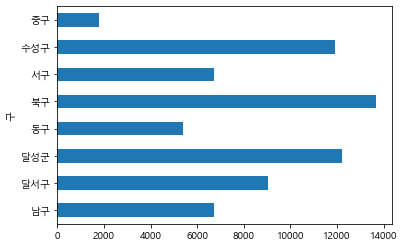

In [192]:
(daegu_cctv_gu['인구수_총'] / daegu_cctv_gu['설치개수']).plot(kind='barh')

<AxesSubplot:ylabel='구'>

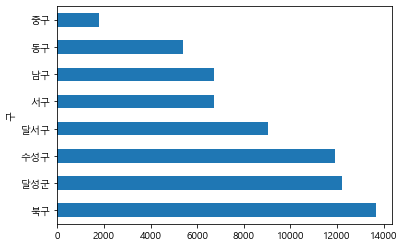

In [193]:
(daegu_cctv_gu['인구수_총'] / daegu_cctv_gu['설치개수']).sort_values(ascending=False).plot(kind='barh')

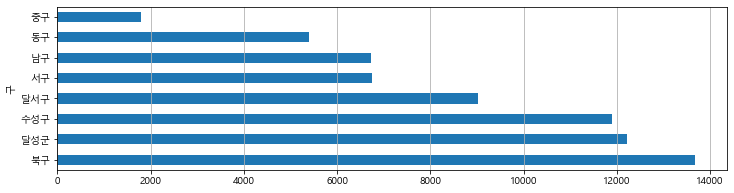

In [194]:
plt.figure(figsize=(12, 3))
(daegu_cctv_gu['인구수_총'] / daegu_cctv_gu['설치개수']).sort_values(ascending=False).plot(kind='barh')
plt.grid(True, axis='x')
plt.show()

<AxesSubplot:xlabel='구'>

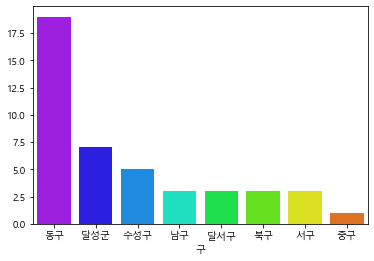

In [195]:
dcg_s1 = daegu_cctv_gu['최근설치개수'].sort_values(ascending=False)
# 시각화
sns.barplot(x=dcg_s1.index,    # '구',
            y=dcg_s1.values,     # '최근증가수'
            palette='gist_rainbow_r')

C:\Users\YJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\YJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


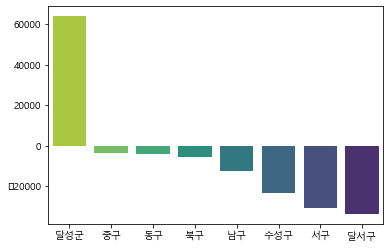

In [196]:
# 인구증가수_총'로 정렬(내림차순)하여 보기 
dcg_s2 = daegu_cctv_gu['인구증가수_총'].sort_values(ascending=False)
# 시각화
sns.barplot(x=dcg_s2.index.tolist(),    # '구',
            y=dcg_s2.values.tolist(),     # '인구증가율_수''
            palette='viridis_r')
plt.show()

In [197]:
plt.rc('axes', unicode_minus=False)

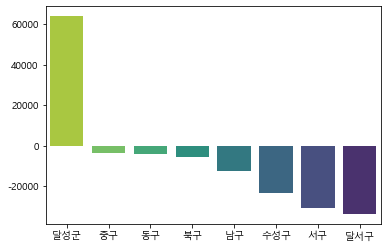

In [198]:
dcg_s5 = daegu_cctv_gu['인구증가수_총'].sort_values(ascending=False)
# 시각화
sns.barplot(x=dcg_s5.index.tolist(),    # '구',
            y=dcg_s5.values.tolist(),     # '인구증가율_수''
            palette='viridis_r')
plt.show()

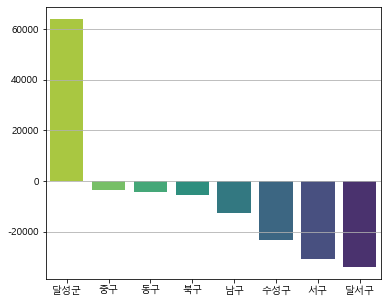

In [199]:
dcg_s5 = daegu_cctv_gu['인구증가수_총'].sort_values(ascending=False)
# 시각화
plt.figure(figsize=(6, 5))
sns.barplot(x=dcg_s5.index.tolist(),    # '구',
            y=dcg_s5.values.tolist(),     # '인구증가율_수''
            palette='viridis_r')
plt.grid(True, axis='y')
plt.show()

In [200]:
daegu_cctv_gu.columns

Index(['설치개수', '최근설치개수', '이전설치개수', 'cctv개수증가율', '인구수_남', '인구수_여', '인구수_총',
       '인구증가수_남', '인구증가수_여', '인구증가수_총'],
      dtype='object')

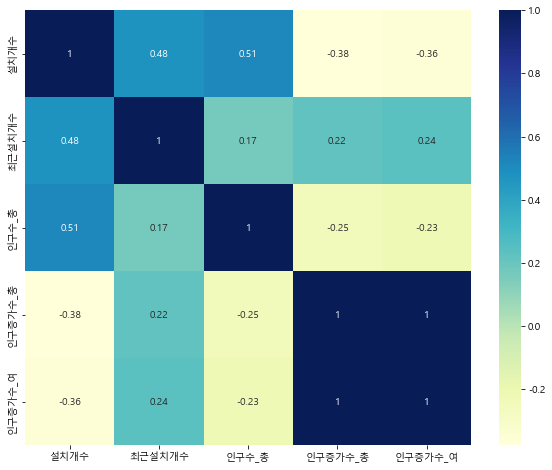

In [201]:
col_list = ['설치개수', '최근설치개수', '인구수_총', '인구증가수_총', '인구증가수_여']
plt.figure(figsize=(10, 8))
sns.heatmap(daegu_cctv_gu[col_list].corr(), annot=True, cmap="YlGnBu")
plt.show()

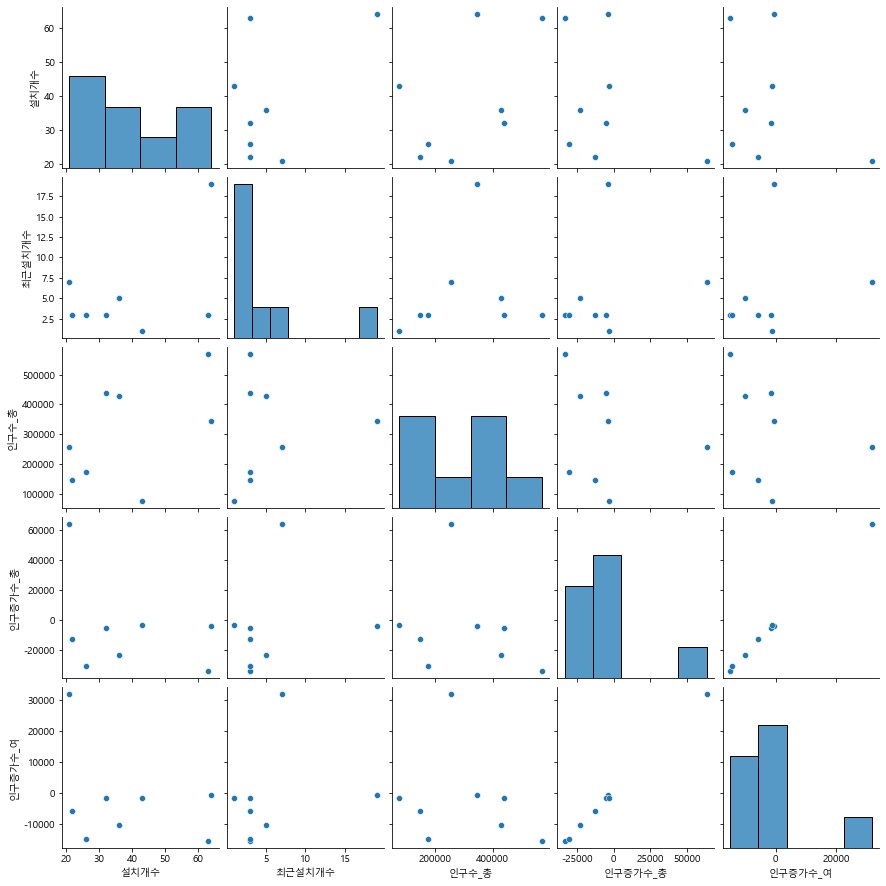

In [202]:
sns.pairplot(daegu_cctv_gu[col_list])
plt.show()

In [203]:
daegu_cctv_gu.columns

Index(['설치개수', '최근설치개수', '이전설치개수', 'cctv개수증가율', '인구수_남', '인구수_여', '인구수_총',
       '인구증가수_남', '인구증가수_여', '인구증가수_총'],
      dtype='object')

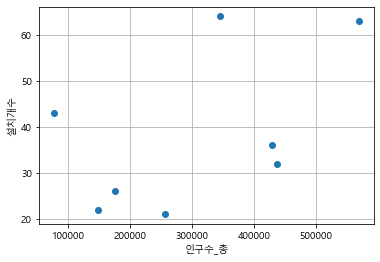

In [204]:
plt.scatter(daegu_cctv_gu['인구수_총'], daegu_cctv_gu['설치개수'])
plt.xlabel('인구수_총')
plt.ylabel('설치개수')
plt.grid()
plt.show()

In [205]:
fp1 = np.polyfit(daegu_cctv_gu['인구수_총'], daegu_cctv_gu['설치개수'], 1)
fp1

array([5.18623749e-05, 2.25697403e+01])

In [206]:
### poly1d => 함수로 만들어 줌 ###
# fp1[0] * 1 + fp1[1]
f1 = np.poly1d(fp1)

# 5.18623749e-05 * 1 + 2.25697403e+01
print(f1(1))
# 5.18623749e-05 * 2 + 2.25697403e+01
print(f1(2))
# 1, 2
print(f1([1, 2]))

22.569792152571473
22.569844014946348
[22.56979215 22.56984401]


In [207]:
fx = np.linspace(50000, 600000, 100)
# fx = np.linspace(np.min(daegu_cctv_gu['인구수_총']), np.max(daegu_cctv_gu['인구수_여']), 100)

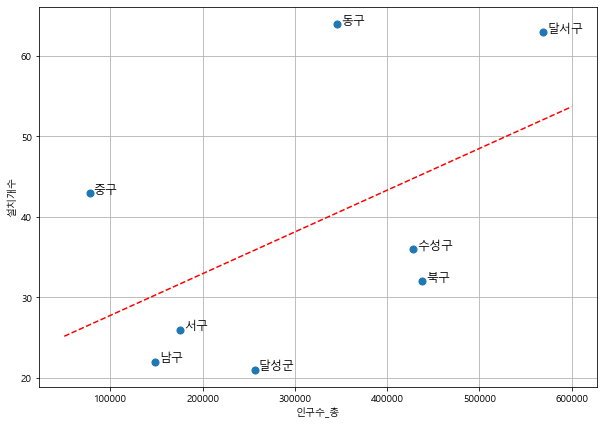

In [208]:
plt.figure(figsize=(10,7))
plt.scatter(daegu_cctv_gu['인구수_총'], daegu_cctv_gu['설치개수'], s=50)
# plt.plot(fx, f1(fx), ls='dashed', lw=2, color='r')
plt.plot(fx, f1(fx), 'r--')

for n in range(daegu_cctv_gu['인구수_총'].shape[0]):
    plt.text(daegu_cctv_gu['인구수_총'][n]+4500, daegu_cctv_gu['설치개수'][n], daegu_cctv_gu.index[n], fontsize=12)

plt.xlabel('인구수_총')
plt.ylabel('설치개수')
# plt.colorbar()
plt.grid()
plt.show()

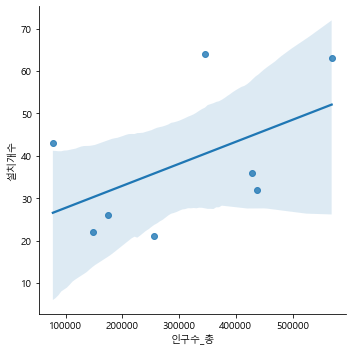

In [209]:
sns.lmplot(x = '인구수_총',
           y = '설치개수',
           data = daegu_cctv_gu)
plt.show()

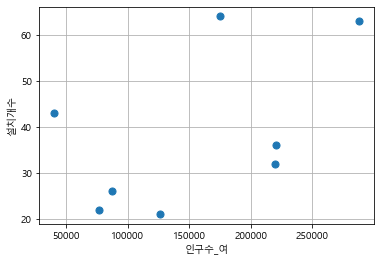

In [210]:
plt.scatter(daegu_cctv_gu['인구수_여'], daegu_cctv_gu['설치개수'], s=50)
plt.xlabel('인구수_여')
plt.ylabel('설치개수')
plt.grid()
plt.show()

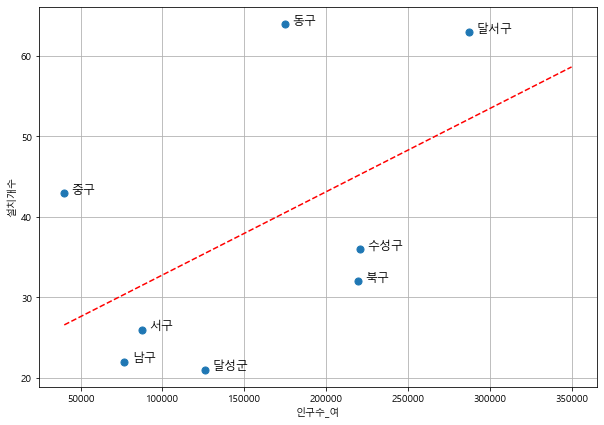

In [211]:
fp1 = np.polyfit(daegu_cctv_gu['인구수_여'], daegu_cctv_gu['설치개수'], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(40000, 350000, 100)
# fx = np.linspace(np.min(daegu_cctv_gu['인구수_여']), np.max(daegu_cctv_gu['인구수_여']), 100)

plt.figure(figsize=(10,7))
plt.scatter(daegu_cctv_gu['인구수_여'], daegu_cctv_gu['설치개수'], s=50)
# plt.plot(fx, f1(fx), ls='dashed', lw=2, color='r')
plt.plot(fx, f1(fx), 'r--')

for n in range(daegu_cctv_gu['인구수_여'].shape[0]):
    plt.text(daegu_cctv_gu['인구수_여'][n]+4500, daegu_cctv_gu['설치개수'][n], daegu_cctv_gu.index[n], fontsize=12)

plt.xlabel('인구수_여')
plt.ylabel('설치개수')
# plt.colorbar()
plt.grid()
plt.show()

<Figure size 720x576 with 0 Axes>

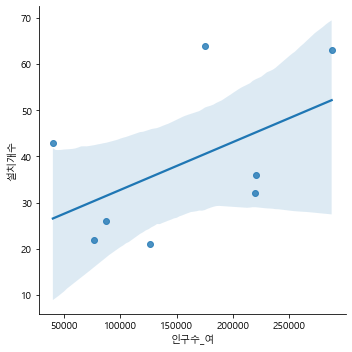

In [212]:
plt.figure(figsize=(10, 8))
sns.lmplot(x = '인구수_여',
           y = '설치개수',
           data = daegu_cctv_gu)
plt.show()

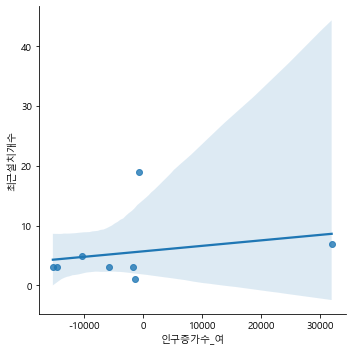

In [213]:
sns.lmplot(x = '인구증가수_여',
           y = '최근설치개수',
           data = daegu_cctv_gu)
plt.show()